## Neuromatch Academy 2020 -- Bayes Day (dry run)
# Tutorial 1 - Bayes rule with Gaussians

Please execute the cell below to initialize the notebook environment

In [0]:
# @title
import time                        # import time 
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random                      # import basic random number generator functions

import matplotlib.pyplot as plt    # import matplotlib
from IPython import display        

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
plt.style.use('ggplot')

%matplotlib inline

---

## Tutorial objectives
  
In this notebook we'll look at using *Bayes rule* with *Gaussian distributions*. That is, given a prior probability distribution, and a likelihood distribution, we will compute the posterior using Bayes rule and play with diffrent Likelihoods and Priors to get a good intuition of how it affects the posterior distribution. 
    
* Given Bayes rule, a Gaussian Likelihood and Prior, calculate the posterior distribution.
* Change the Likelihood mean, and variance and observe how Posterior changes.
* Advanced: Observe what happens if the prior is a mixture of two gaussians?
---

__Insert cover story here with figures, potentially with a GIF__

## Bayes rule
\begin{eqnarray}
Posterior = \frac{ Likelihood \quad \times \quad Prior}{ Normalization \quad constant}
\end{eqnarray}

Mathematically, if both the Likelihood and the Prior are Gaussian, this translates into:

\begin{eqnarray}
    Likelihood = \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) = \frac{1}{\sqrt{2\pi\sigma^2_{likelihood}}}\exp\left(\frac{-(x-\mu_{likelihood})^2}{2\sigma^2_{likelihood}}\right)
\end{eqnarray}

\begin{eqnarray}
    Prior = \mathcal{N}(\mu_{prior},\sigma_{prior}^2) = \frac{1}{\sqrt{2\pi\sigma^2_{prior}}}\exp\left(\frac{-(x-\mu_{prior})^2}{2\sigma^2_{prior}}\right)
\end{eqnarray}

\begin{eqnarray}
    Posterior \propto \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \times \mathcal{N}(\mu_{prior},\sigma_{prior}^2) = \mathcal{N}\left( \frac{\sigma^2_{likelihood}\mu_{prior}+\sigma^2_{prior}\mu_{likelihood}}{\sigma^2_{likelihood}+\sigma^2_{prior}}, \frac{\sigma^2_{likelihood}\sigma^2_{prior}}{\sigma^2_{likelihood}+\sigma^2_{prior}} \right)
\end{eqnarray}

where $\mathcal{N}(\mu,\sigma^2)$ denotes a Gaussian distribution with parameters $\mu_{likelihood}$ and $\sigma^2_{likelihood}$.

---
### EXERCISE 1: Bayes rule with Gaussians: Computation
   
We have a Gaussian auditory Likelihood (in red), and a Gaussian visual likelihood (in blue), and we want to combine the two to generate our posterior using Bayes rule.

We provide you with a ready-to-use plotting function, and a code skeleton.

**Suggestions**
* Fill in the equation for the un-normalised (without the constant) Gaussian in the function skeleton function `my_gaussian`
* Generate an auditory likelihood with parameters $\mu$ 3 and $\sigma$ 1.5
* Generate a visual likelihood with parameters $\mu$ -1 and $\sigma$ 1.5
* Calculate the posterior using pointwise multiplication of the auditory and visual likelihoods (don't forget to normalize)
* Plot the Likelihoods and Posterior using the predefined function `my_plot`
* Now change the variance of the visual likelihood to 0.5. 

   See how a more precise (tighter) visual likelihood relative to auditory results in a posterior that is weighted more heavily towards the most precise source of information.


In [0]:
def my_plot(x, auditory=None, visual=None, posterior_pointwise=None):
    """
    Plots normalized Gaussian distributions and posterior 

    DO NOT EDIT THIS FUNCTION !!!
    
    Args:
      x (numpy array of floats):         points at which the likelihood has been evaluated
      auditory (numpy array of floats):  normalized probabilities for auditory likelihood evaluated at each `x`
      visual (numpy array of floats):    normalized probabilities for visual likelihood evaluated at each `x`
      posterior (numpy array of floats): normalized probabilities for the posterior evaluated at each `x`
             
    Returns:
      Nothing.
    """
    if auditory is None:
      auditory = np.zeros_like(x)

    if visual is None:
      visual = np.zeros_like(x)

    if posterior_pointwise is None:
      posterior_pointwise = np.zeros_like(x)

    plt.plot(x, auditory, '-r', LineWidth=2, label='Auditory')
    plt.plot(x, visual, '-b', LineWidth=2, label='Visual')
    plt.plot(x, posterior_pointwise, '-g', LineWidth=2, label='Posterior')
    plt.legend()
    plt.ylabel('Probability')
    plt.xlabel('Orientation (Degrees)')

def my_gaussian(x_points, mu, sigma):
    """
    Returns un-normalized Gaussian estimated at points `x_points`, with parameters: mean `mu` and std `sigma`
    
    Args:
      x_points (numpy array of floats): points at which the gaussian is evaluated
      mu (scalar): mean of the Gaussian
      sigma (scalar): std of the gaussian
    
    Returns: 
      (numpy array of floats) : un-normalized Gaussian (i.e. without constant) evaluated at `x`
    """

    ###################################################################
    ## Insert your code here to fill with the equation for the gaussian
    ## Function Hints: exp -> np.exp()
    ##                 power -> z**2       
    ################################################################### 
        
    # Calculate the gaussian as a function of mu and sigma, for each x (incl. hints )
    raise NotImplementedError("You need to implement the Gaussian function!")

x = np.arange(-8,9,0.1)

################################################################################
## Insert your code here to:
##      create a gaussian called 'auditory' with mean 3, and std 1.5
##      create a gaussian called 'visual' with mean -1, and std 1.5
##      calculate the posterior by multiplying (pointwise) the 'auditory' and 'visual' gaussians
##      (Hint: Do not forget to normalise the gaussians before plotting them)
##      plot the distributions using the function `my_plot`
################################################################################



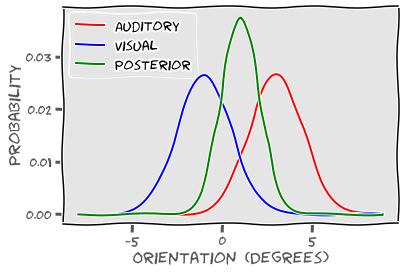

In [0]:
# @title
display.display((display.HTML('<h2>EXPECTED OUTPUT </h2>')))
with plt.xkcd():
    my_plot(
        x,
        auditory/np.sum(auditory),
        visual/np.sum(visual),
        posterior_pointwise/np.sum(posterior_pointwise)
    )
    plt.show()

---
### EXERCISE 2: Bayes rule with Gaussians: Intuition
   
Now that we can compute *Bayes rule* with two *Gaussians*, let's keep the auditory likelihood fixed straight ahead (mean = 0), and play around with the visual stimulus position (mean) to see how that affects the posterior.

Observe how the posterior changes as a function of both the position of the likelihood with respect to the prior, and the relative weight of the likelihood with respect to the prior.

**Suggestions**

* Keep the prior constant with mean 0, and standard deviation 1.5
* Keeping the standard deviation of the visual stimuli to 1, and allow the mean of the likelihood to vary from -8 to 8 in steps of 0.2 degree.
* In a loop, calculate the posterior for each new visual stimulus, and call the `my_dynamic_plot` function to plot it.
* Calculate the mean of the posterior and plot it against the visual stimulus mean. What do you observe?

In [0]:
def my_dynamic_plot(x, auditory, visual, posterior_pointwise):
    """
    DO NOT EDIT THIS FUNCTION !!!

    Plots the auditory, visual and posterior distributions and update the figure every .2 seconds
    
    Args: 
      x (numpy array of floats):         points at which the likelihood has been evaluated
      auditory (numpy array of floats):  normalized probabilities for auditory likelihood evaluated at each `x`
      visual (numpy array of floats):    normalized probabilities for visual likelihood evaluated at each `x`
      posterior (numpy array of floats): normalized probabilities for the posterior evaluated at each `x`
             
    Returns:
      Nothing
    """
    
    plt.clf()
    plt.plot(x, auditory, '-r', LineWidth=2, label='Auditory')
    plt.plot(x, visual, '-b', LineWidth=2, label='Visual')
    plt.plot(x, posterior_pointwise, '-g', LineWidth=2, label='Posterior')
    plt.ylabel('Probability')
    plt.xlabel('Orientation (Degrees)')
    plt.legend()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.2)

x = np.arange(-10,11,0.1)

###############################################################################
##  Insert your code here to:
##      create a gaussian called 'auditory' with mean 0, and std 1.5
##      create a gaussian called 'visual' with std 1.5, and mean varying from -8 to 9 in increments of 0.2 Degrees
##      calculate the posterior by multiplying (pointwise) the 'auditory' and 'visual' gaussians
##      (Hint: Do not forget to normalise the gaussians before plotting them)
##      plot the distributions using the function `my_dynamic_plot`
##      plot the posterior mean as a function of  visual's mean
###############################################################################


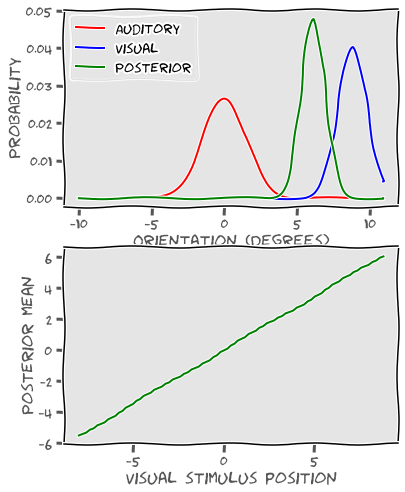

In [0]:
# @title
display.display((display.HTML('<h2>EXPECTED OUTPUT </h2>')))
with plt.xkcd():
  fig = plt.figure(figsize=(fig_w, 2*fig_h))
  plt.subplot(2, 1, 1)
  my_plot(
      x, 
      auditory/np.sum(auditory),
      visual/np.sum(visual),
      posterior_pointwise/np.sum(posterior_pointwise)
  )  
  plt.subplot(2, 1, 2)
  plt.plot(visual_mean, mean_posterior,'-g',label='argmax')
  plt.xlabel('Visual stimulus position')
  plt.ylabel('Posterior mean')
  plt.show()

---
### ADVANCED Exercise: Multimodal priors

Bayes rule work similarly for cue combination (auditory + visual) as it would with a prior and likelihood.
What do you think is going to happen to the posterior if we were to use a multimodal prior instead of a single Gaussian (i.e. a prior with multiple peaks)?

**Suggestions**
* Create a bi-modal prior by summing two Gaussians centered on -3 and 3 respectively, with $\sigma_{prior}$ = 1


* Similarly to the previous exercise, allow the mean of the likelihood to vary and plot the prior, likelihood and posterior over time using the function `my_dynamic_plot`. 
   
   - Observe what happens to the posterior as the likelihood gets closer to the different peaks of the prior.
   
   - Notice what happens to the posterior when the likelihood is exactly in between the two modes of the prior (i.e. $\mu_{Likelihood}$ = 0)

* Plot the mode of the posterior as a function of the visual stimulus mean. 
   
   - What to you observe? How does it compare to the previous exercise?

In [0]:
x = np.arange(-10,11,0.1)

################################################################################
## Insert your code here
## Reuse your code from Exercise 2, but replace the prior with a bimodal prior 
## by summing two Gaussians with variance = 1, and means [-3, 3] respectively
################################################################################

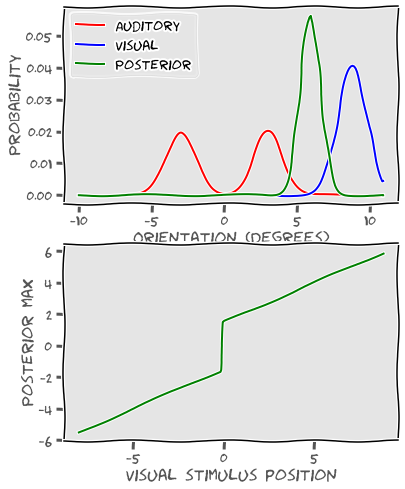

In [0]:
# @title
display.display((display.HTML('<h2>EXPECTED OUTPUT </h2>')))
with plt.xkcd():
  fig
  fig = plt.figure(figsize=(fig_w, 2*fig_h))
  plt.subplot(2, 1, 1)
  my_plot(
        x,
        auditory_bimodal,
        visual/np.sum(visual),
        posterior_pointwise/np.sum(posterior_pointwise)
  )
  plt.subplot(2, 1, 2)
  plt.plot(visual_mean,mode_posterior,'-g',label='argmax')
  plt.xlabel('Visual stimulus position')
  plt.ylabel('Posterior max')
  plt.show()